<a href="https://colab.research.google.com/github/PikasXYZ/TAIWAN-DESIGN-EXPO-23-in-NEW-TAIPEI-CITY/blob/main/DesignExpo2023_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Author:** PikasXYZ

**Date:** 2023/10/09

**Description:**

This program is used to try all the possibility of a psychological(?) test called "找找圈內人",

Results are saved as "DesignExpo2023.csv".
This program is used to find out the judgment way from every possibility of selection and results of the psychological test made for TAIWAN DESIGN EXPO '23 in NEW TAIPEI CITY, and it's called [《找找圈內人！》](https://event.designexpo.org.tw/) !

#Preparation

In [25]:
#@title import
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from IPython.display import clear_output, display, Image
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [7]:
#@title download data
#@markdown Download data collected by Selenium.
!gdown --id 1oeMbFs4ZTypx7AxuRSrqUVyLr6G5mq98 --output DesignExpo2023.csv
data = pd.read_csv("DesignExpo2023.csv")

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1oeMbFs4ZTypx7AxuRSrqUVyLr6G5mq98
To: /content/DesignExpo2023.csv
100% 113k/113k [00:00<00:00, 76.5MB/s]


#Initial Analysis

In [8]:
#@title data.info()
#@markdown Let's start from information of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q1      4096 non-null   int64
 1   Q2      4096 non-null   int64
 2   Q3      4096 non-null   int64
 3   Q4      4096 non-null   int64
 4   Q5      4096 non-null   int64
 5   Q6      4096 non-null   int64
 6   Q7      4096 non-null   int64
 7   Q8      4096 non-null   int64
 8   Q9      4096 non-null   int64
 9   Q10     4096 non-null   int64
 10  Q11     4096 non-null   int64
 11  Q12     4096 non-null   int64
 12  Result  4096 non-null   int64
dtypes: int64(13)
memory usage: 416.1 KB


In [9]:
#@title data.head()
#@markdown Every question has 2 selection displayed as 0 & 1, along with a result no. between 1~16.
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Result
0,0,0,0,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,0,1,7
2,0,0,0,0,0,0,0,0,0,0,1,0,7
3,0,0,0,0,0,0,0,0,0,0,1,1,7
4,0,0,0,0,0,0,0,0,0,1,0,0,7


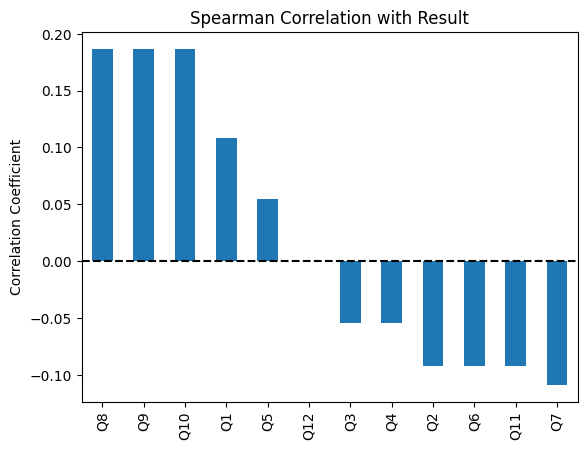

Q8     0.186699
Q9     0.186699
Q10    0.186699
Q1     0.108625
Q5     0.054313
Q12    0.000000
Q3    -0.054313
Q4    -0.054313
Q2    -0.091652
Q6    -0.091652
Q11   -0.091652
Q7    -0.108625
Name: Result, dtype: float64

In [10]:
#@title Spearman Correlation with Result
#@markdown It seems weird that the answer of Q12 is irrelated to the result, while some questions and results are negative correlated...
correlations = data.corr(method='spearman')['Result'].drop('Result')
correlations.sort_values(ascending=False).plot(kind='bar')
plt.title('Spearman Correlation with Result')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='black', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()
correlations.sort_values(ascending=False)

sum = 4096


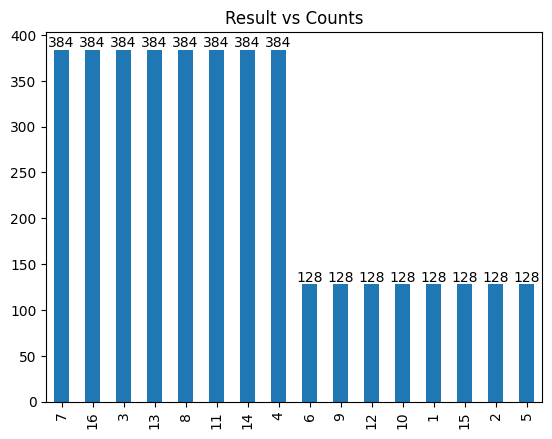

In [11]:
#@title Result vs Counts
#@markdown It seems weird again that the frequency of each result is different...
ax = data["Result"].value_counts().plot(kind='bar',title="Result vs Counts")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
print("sum =", data["Result"].value_counts().sum())
plt.show()

In [12]:
#@title rare results & common results
#@markdown So let's seperate the results by their frequency for now.
result_count = data["Result"].value_counts()
rare = result_count[result_count==128].index
common = result_count[result_count==384].index
print("Rare results:", ', '.join(list(str(x) for x in rare)))
print("Commoon results:", ', '.join(list(str(x) for x in common)))

Rare results: 6, 9, 12, 10, 1, 15, 2, 5
Commoon results: 7, 16, 3, 13, 8, 11, 14, 4


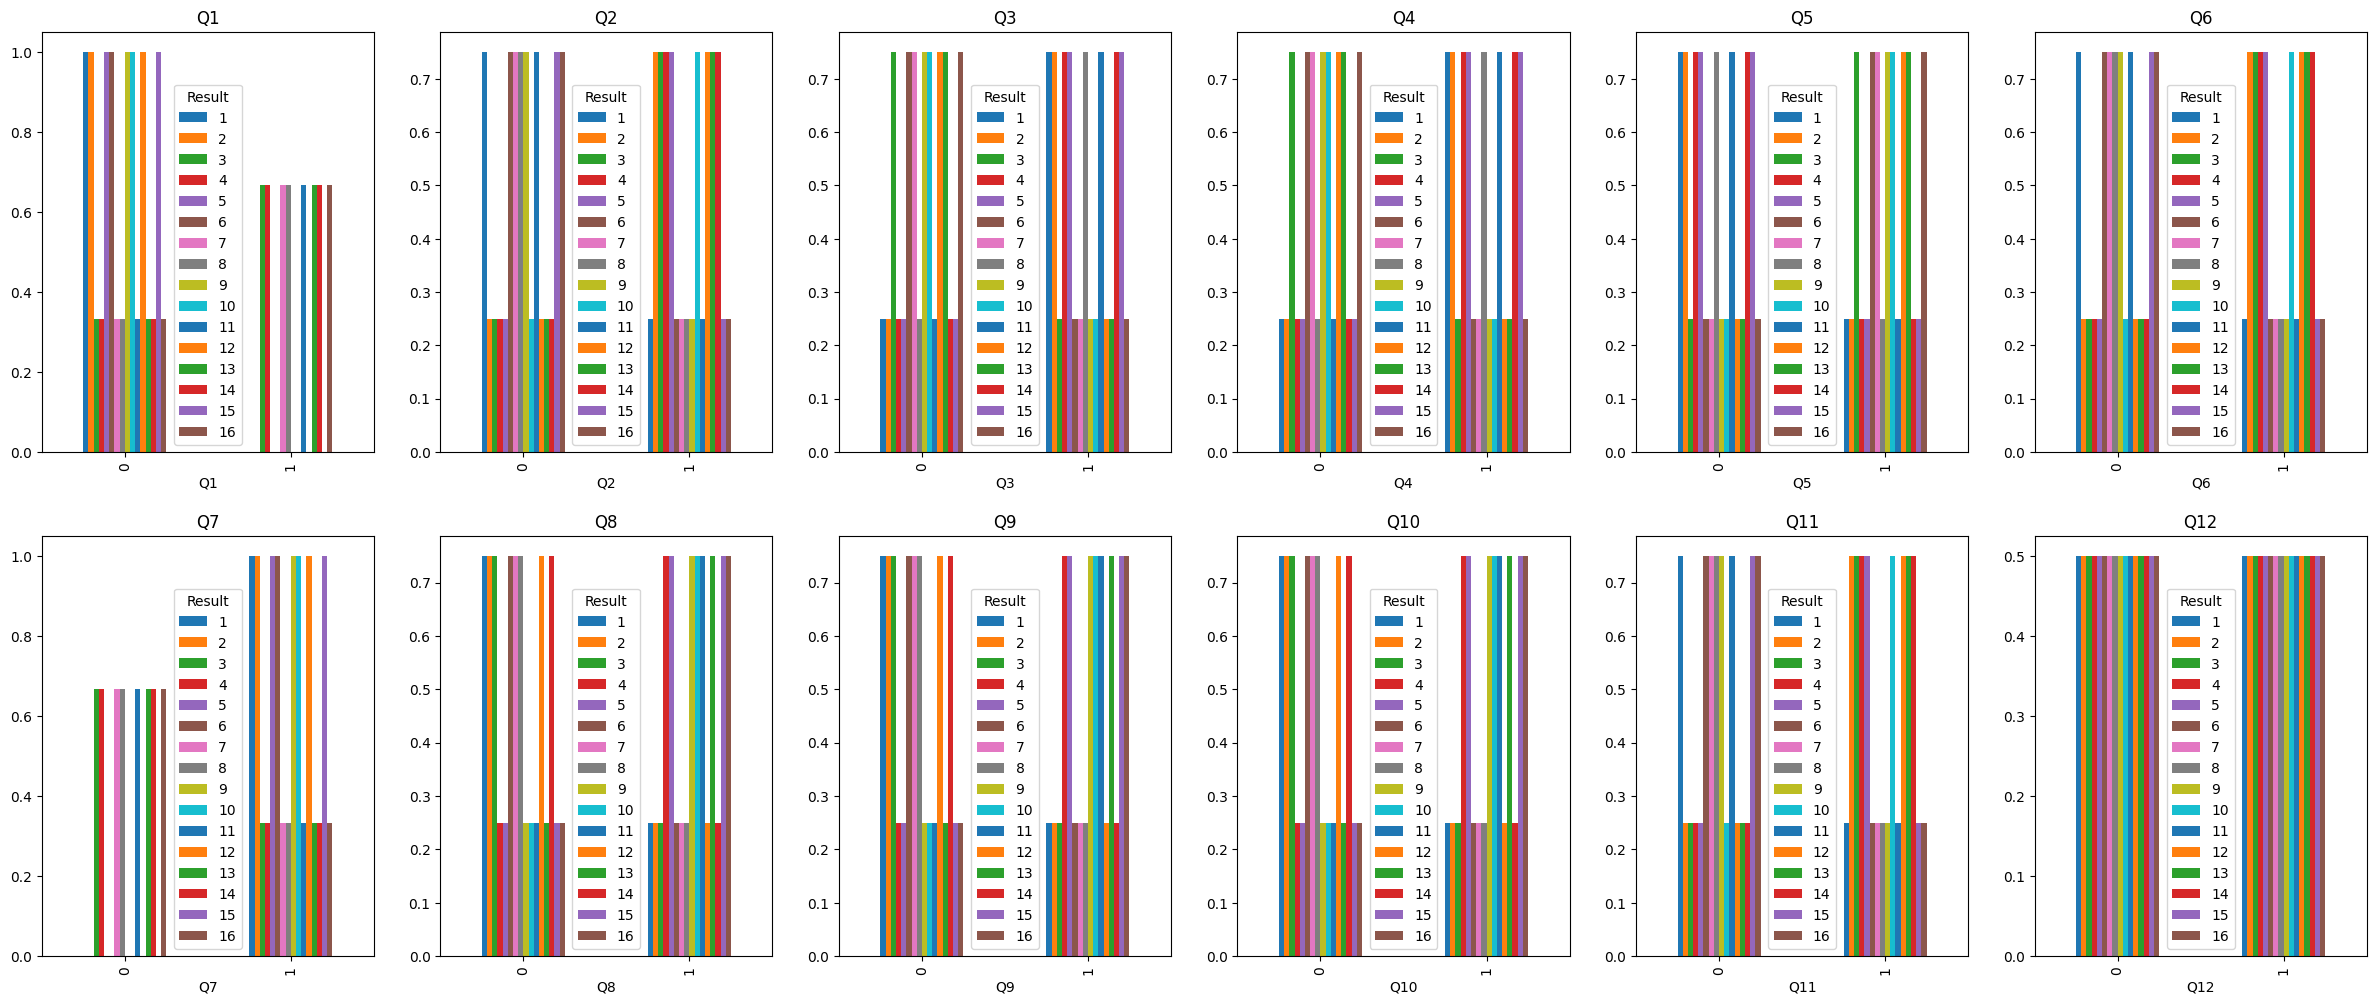

In [13]:
#@title Selection to Result of Each Question

fig, axs = plt.subplots(2, 6, figsize=(30, 12))
axs = axs.flatten()

# Plot the distribution of answers for each question, grouped by the result
for i, column in enumerate(data.drop(columns='Result').columns):
    pd.crosstab(index=data[column], columns=data['Result'], normalize='columns').plot(kind='bar', ax=axs[i], title=column)

plt.legend(title='Result', loc='best')
plt.show()

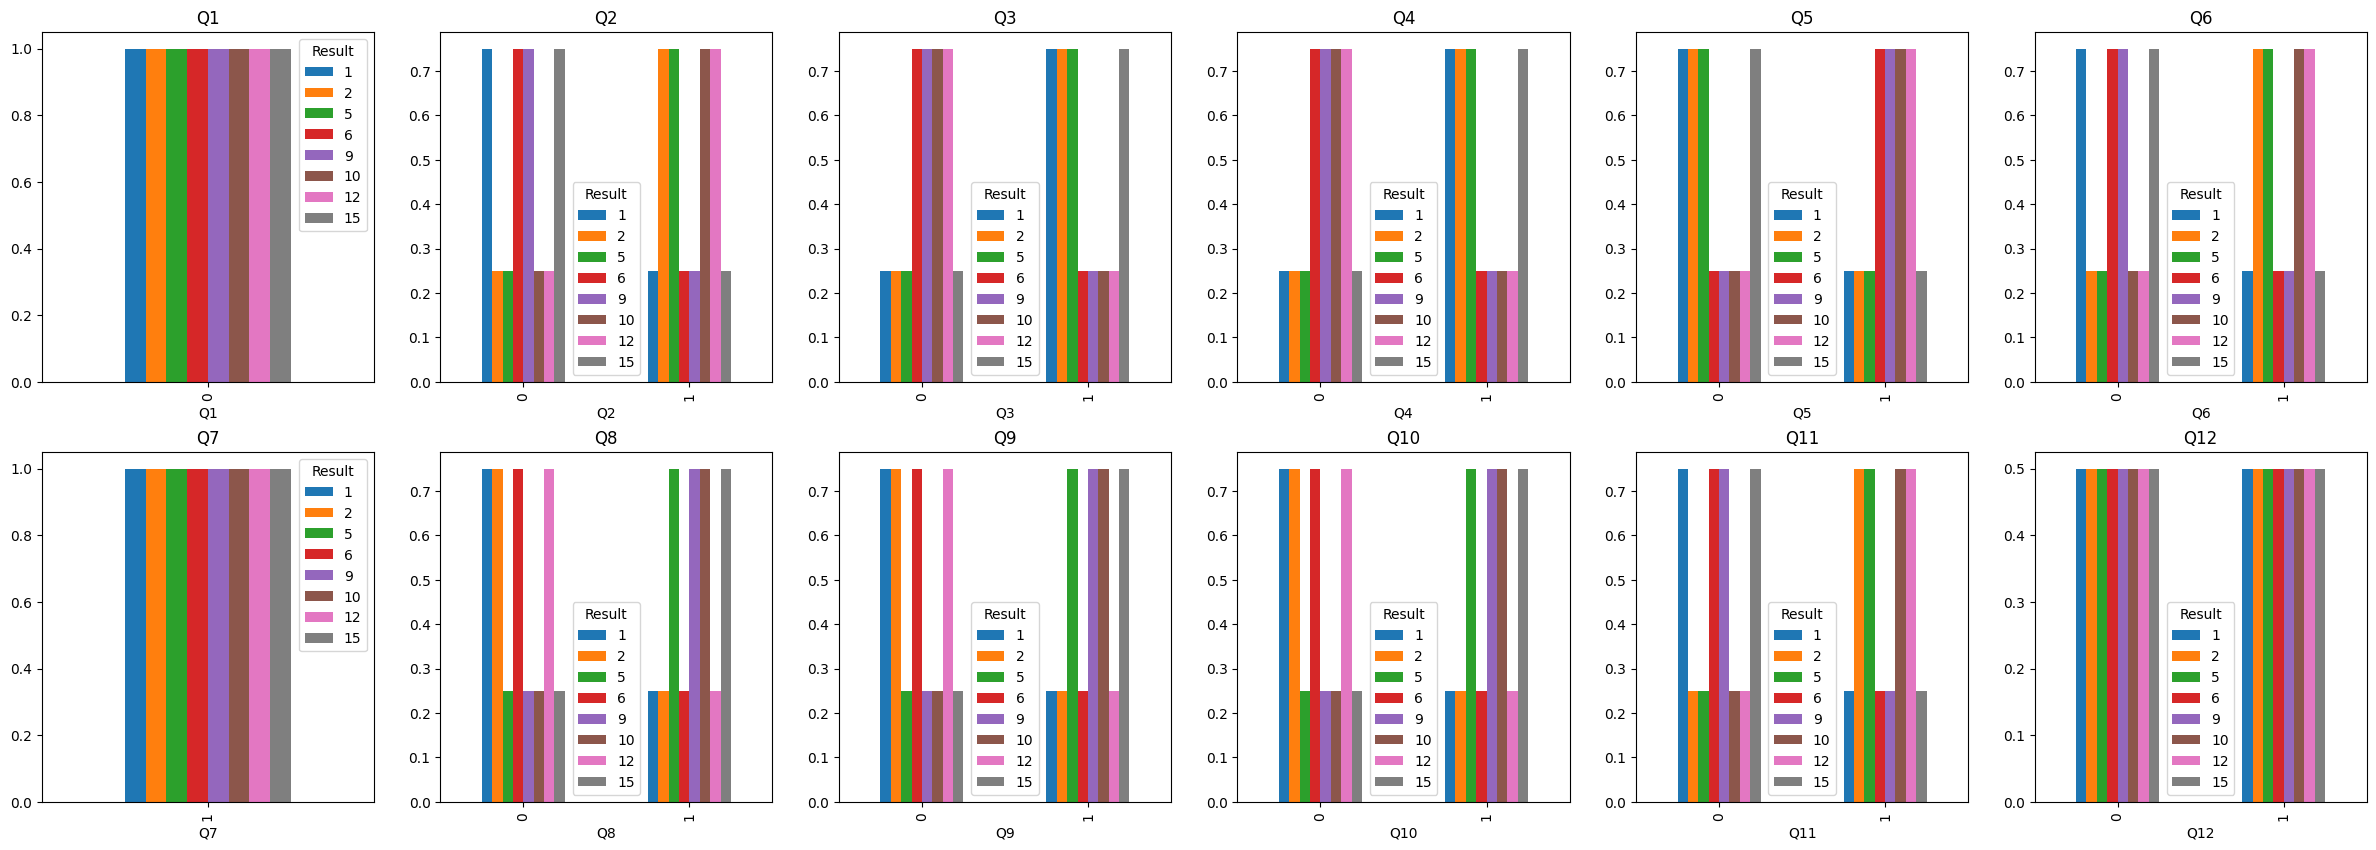

In [14]:
#@title Selection to Rare Result of Each Question

data_rare = data[data["Result"].isin(rare)]
fig, axs = plt.subplots(2, 6, figsize=(30, 10))
axs = axs.flatten()

# Plot the distribution of answers for each question, grouped by the result
for i, column in enumerate(data_rare.drop(columns='Result').columns):
    pd.crosstab(index=data_rare[column], columns=data_rare['Result'], normalize='columns').plot(kind='bar', ax=axs[i], title=column)

plt.legend(title='Result', loc='best')
plt.show()

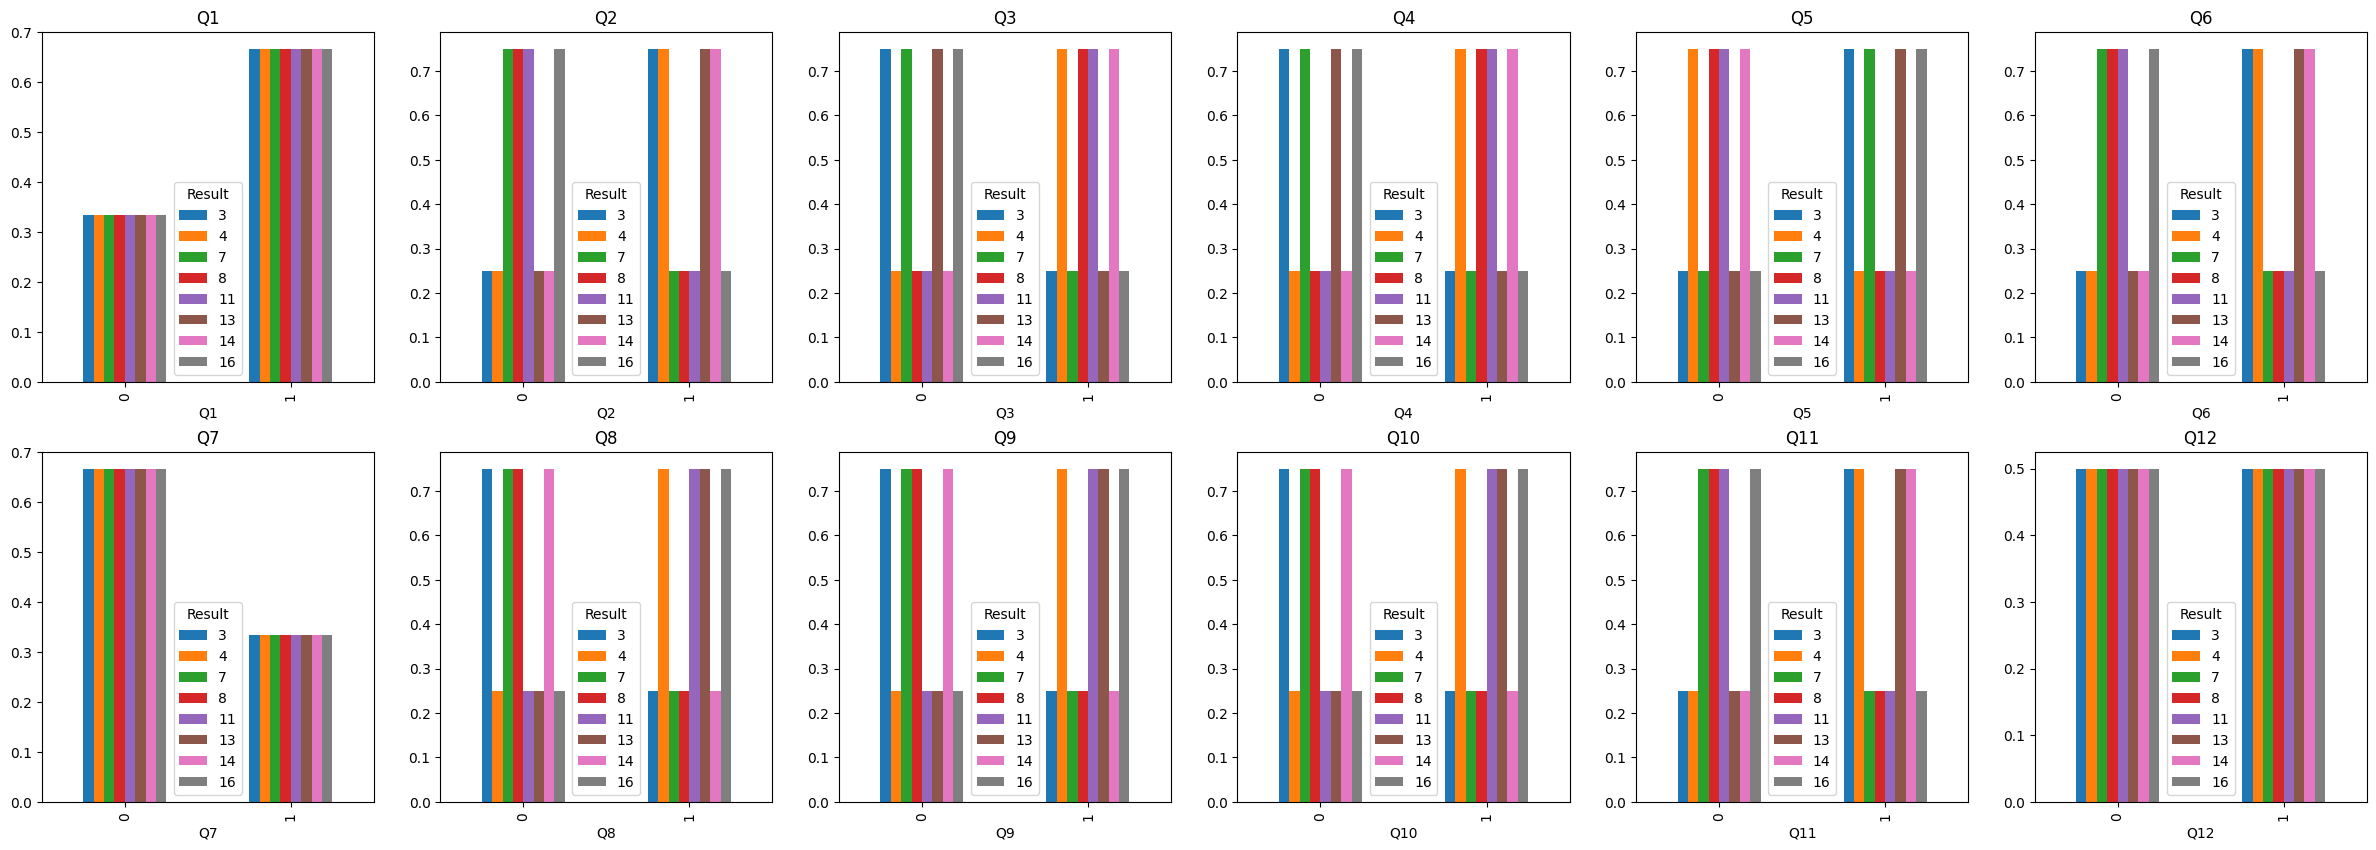

In [15]:
#@title Selection to Common Result of Each Question

data_common = data[data["Result"].isin(common)]
fig, axs = plt.subplots(2, 6, figsize=(30, 10))
axs = axs.flatten()

# Plot the distribution of answers for each question, grouped by the result
for i, column in enumerate(data_common.drop(columns='Result').columns):
    pd.crosstab(index=data_common[column], columns=data_common['Result'], normalize='columns').plot(kind='bar', ax=axs[i], title=column)

plt.legend(title='Result', loc='best')
plt.show()

#What if those Results are Determined by voting per 3 Questions?

In [16]:
#@title Create Ideal Results
#@markdown Divide questions into 4 groups per 3 questions in order and get ideal results by voting result of each group.
# Define a function to get the voting result of a group of questions
def get_voting_result(row, questions):
    return int(row[questions].mean() > .5)

# Define the question groups per 3 questions in order
question_groups = [['Q1', 'Q2', 'Q3'], ['Q4', 'Q5', 'Q6'], ['Q7', 'Q8', 'Q9'], ['Q10', 'Q11', 'Q12']]

# Calculate the voting result for each group
for i, group in enumerate(question_groups):
    data[f'Vote_{i+1}'] = data.apply(get_voting_result, questions=group, axis=1)

# Combine the voting results to get a 4-digit binary code
data['Ideal_Result'] = data[['Vote_1', 'Vote_2', 'Vote_3', 'Vote_4']].astype(str).agg(''.join, axis=1).apply(lambda x: int(x, 2)+1)
data = data.drop(['Vote_1', 'Vote_2', 'Vote_3', 'Vote_4'], axis=1)
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Result,Ideal_Result
0,0,0,0,0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,0,0,0,1,7,1
2,0,0,0,0,0,0,0,0,0,0,1,0,7,1
3,0,0,0,0,0,0,0,0,0,0,1,1,7,2
4,0,0,0,0,0,0,0,0,0,1,0,0,7,1


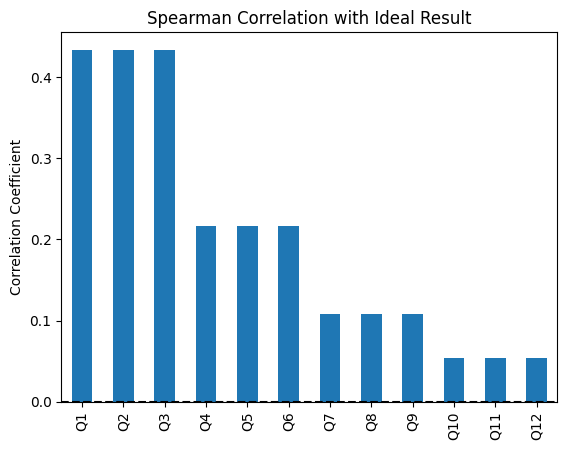

Q1     0.433861
Q2     0.433861
Q3     0.433861
Q4     0.216930
Q5     0.216930
Q6     0.216930
Q7     0.108465
Q8     0.108465
Q9     0.108465
Q10    0.054233
Q11    0.054233
Q12    0.054233
Name: Ideal_Result, dtype: float64

In [17]:
#@title Spearman Correlation with Ideal Result
#@markdown Spearman correlation w/ ideal results are all positive and divided into 4 stair halved stair by stair.
#@markdown
#@markdown The reason why the correlation of questions in every gruop are different may be the comparable data type (int) of the ideal result.
ideal_correlations = data.corr(method='spearman')['Ideal_Result'].drop(['Result','Ideal_Result'])
ideal_correlations.sort_values(ascending=False).plot(kind='bar')
plt.title('Spearman Correlation with Ideal Result')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='black', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()
ideal_correlations.sort_values(ascending=False)

sum = 4096


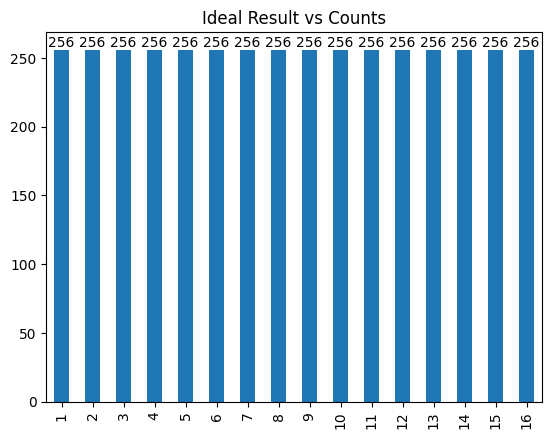

In [24]:
#@title Ideal Result vs Counts
#@markdown As expected, counts of every results shuold be same.
ax = data["Ideal_Result"].value_counts().plot(kind='bar',title="Ideal Result vs Counts")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
print("sum =", data["Ideal_Result"].value_counts().sum())
plt.show()

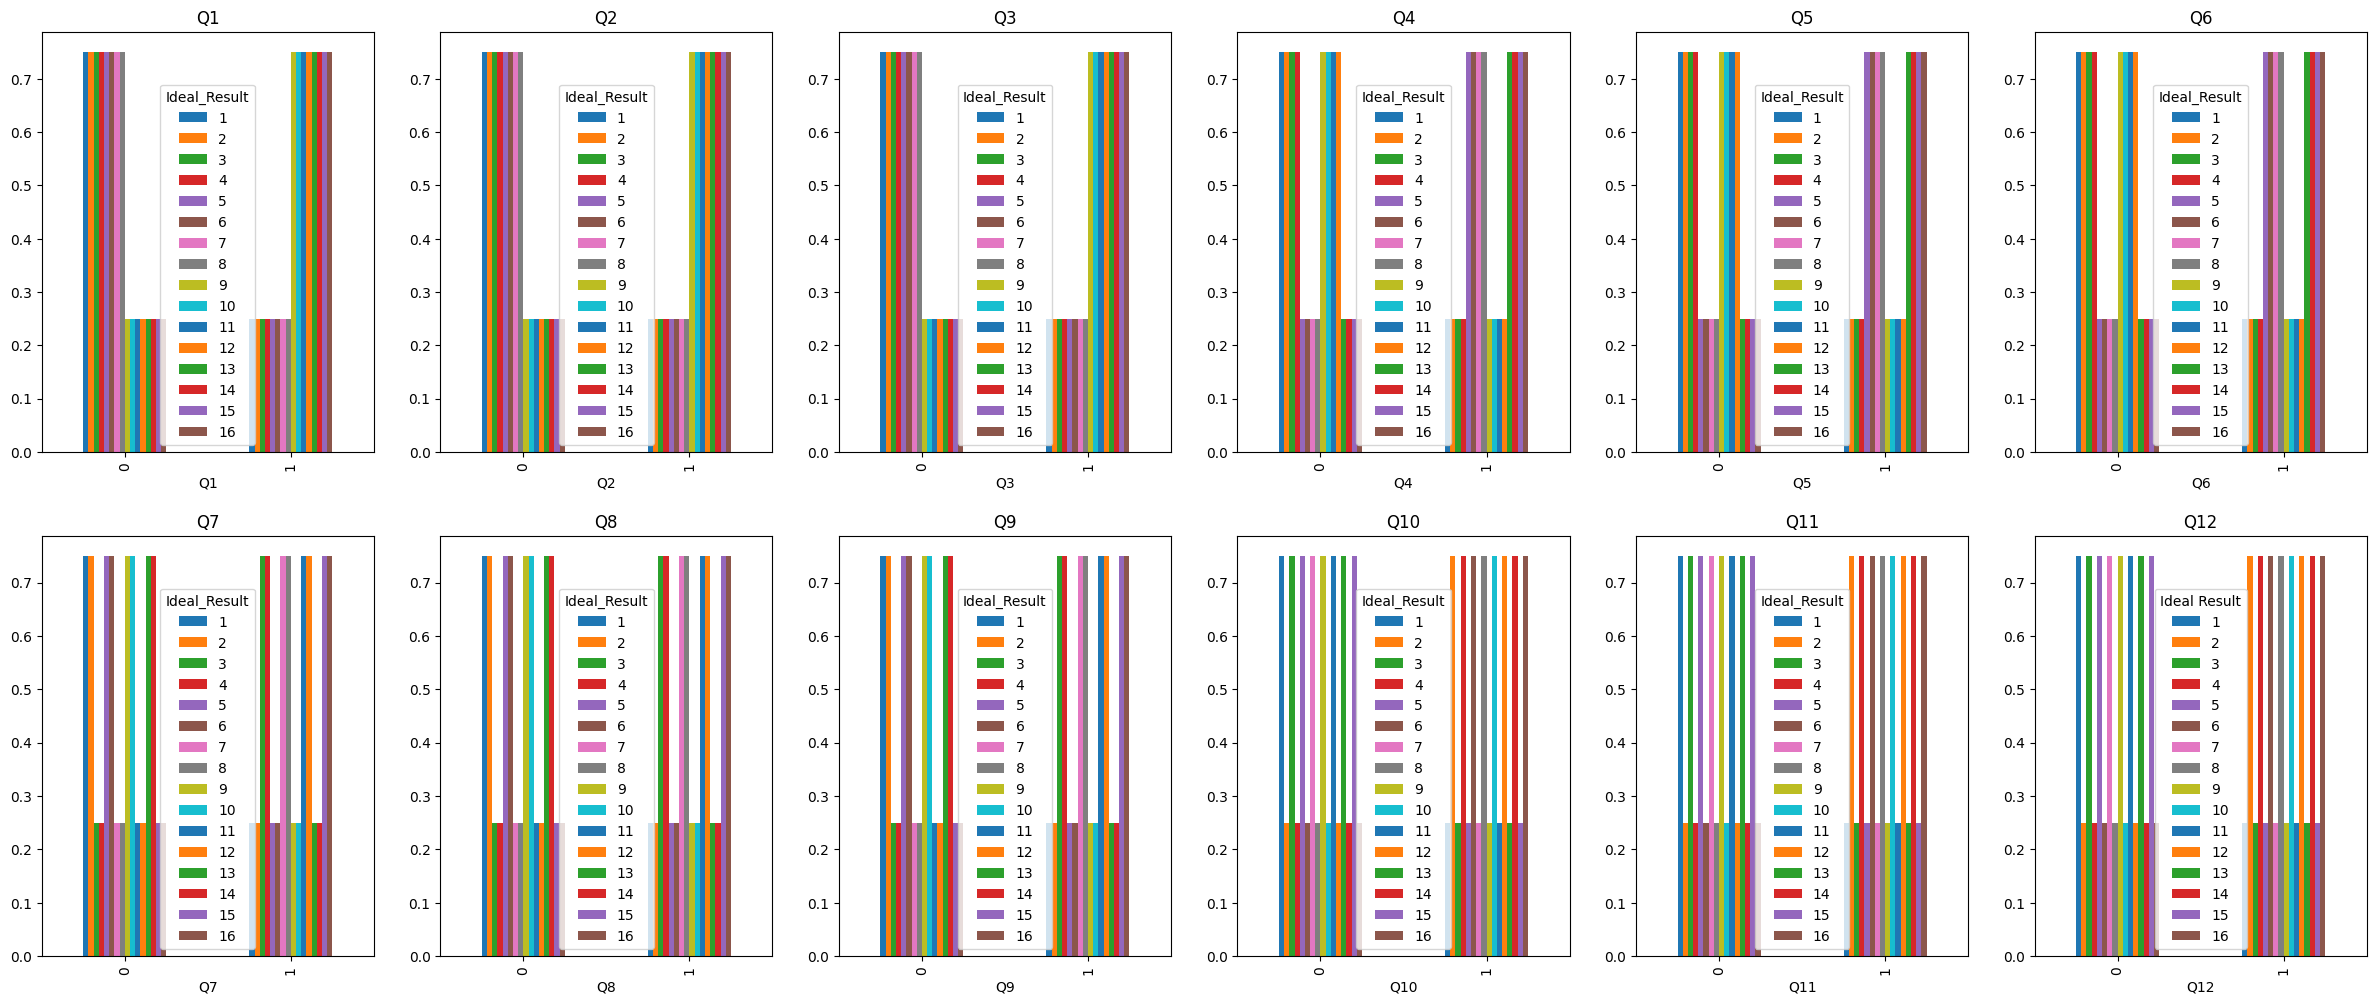

In [19]:
#@title Selection to Ideal Result of Each Question
#@markdown The group order is unclear and probably not in order.
#@markdown
#@markdown However, the ideal results of 0&1 in each question are completely opposite whaterver the group order is.
fig, axs = plt.subplots(2, 6, figsize=(30, 12))
axs = axs.flatten()

# Plot the distribution of answers for each question, grouped by the result
for i, column in enumerate(data.drop(['Ideal_Result','Result'], axis=1).columns):
    pd.crosstab(index=data[column], columns=data['Ideal_Result'], normalize='columns').plot(kind='bar', ax=axs[i], title=column)

plt.legend(title='Ideal Result', loc='best')
plt.show()

#Modify Original Data

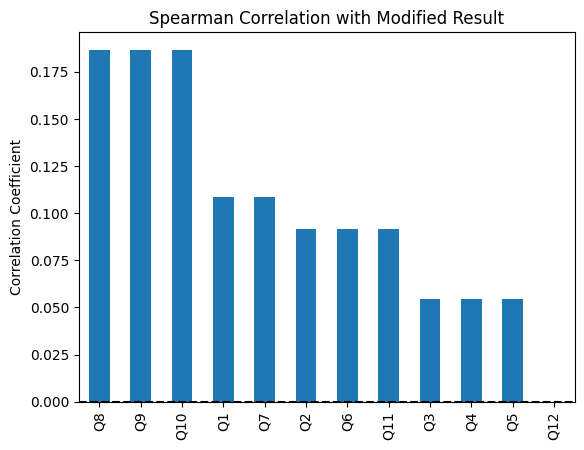

Q8     0.186699
Q9     0.186699
Q10    0.186699
Q1     0.108625
Q7     0.108625
Q2     0.091652
Q6     0.091652
Q11    0.091652
Q3     0.054313
Q4     0.054313
Q5     0.054313
Q12    0.000000
Name: Result, dtype: float64

In [20]:
#@title Toggle weird data
#@markdown Since we know that all the correlation coefficients should be positvie in ideal case, let's toogle (0→1, 1→0) all answers of questions owning negative correlation coefficients.
#@markdown
#@markdown After toggling, almost all the correlation coefficients are positive now, although the one of Q12 is still 0.
#@markdown
#@markdown Besides, the decisive groups of question are most likely [Q8, Q9, Q10], [Q1, Q7, Q12], [Q2, Q6, Q11], and [Q3, Q4, Q5] in order.
columns2modify = list(correlations[correlations<0].index) #questions that has negative correlation coefficients
data[columns2modify] = data[columns2modify] ^ 1

modified_correlations = data.corr(method='spearman')['Result'].drop(['Result', 'Ideal_Result'])
modified_correlations.sort_values(ascending=False).plot(kind='bar')
plt.title('Spearman Correlation with Modified Result')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='black', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()
modified_correlations.sort_values(ascending=False)

In [21]:
#@title Create Proper Results
#@markdown Divide questions into 4 groups per 3 questions in the order below and get proper results by voting result of each group.
# Define a function to get the voting result of a group of questions
def get_voting_result(row, questions):
    return int(row[questions].mean() > .5)

# Define the question groups per 3 questions in order
question_groups = [['Q8', 'Q9', 'Q10'], ['Q1', 'Q7', 'Q12'], ['Q2', 'Q6', 'Q11'], ['Q3', 'Q4', 'Q5']]

# Calculate the voting result for each group
for i, group in enumerate(question_groups):
    data[f'Vote_{i+1}'] = data.apply(get_voting_result, questions=group, axis=1)

# Combine the voting results to get a 4-digit binary code
data['Proper_Result'] = data[['Vote_1', 'Vote_2', 'Vote_3', 'Vote_4']].astype(str).agg(''.join, axis=1).apply(lambda x: int(x, 2)+1)
data = data.drop(['Vote_1', 'Vote_2', 'Vote_3', 'Vote_4'], axis=1)
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Result,Ideal_Result,Proper_Result
0,0,1,1,1,0,1,1,0,0,0,1,0,7,1,4
1,0,1,1,1,0,1,1,0,0,0,1,1,7,1,8
2,0,1,1,1,0,1,1,0,0,0,0,0,7,1,4
3,0,1,1,1,0,1,1,0,0,0,0,1,7,2,8
4,0,1,1,1,0,1,1,0,0,1,1,0,7,1,4


sum = 4096


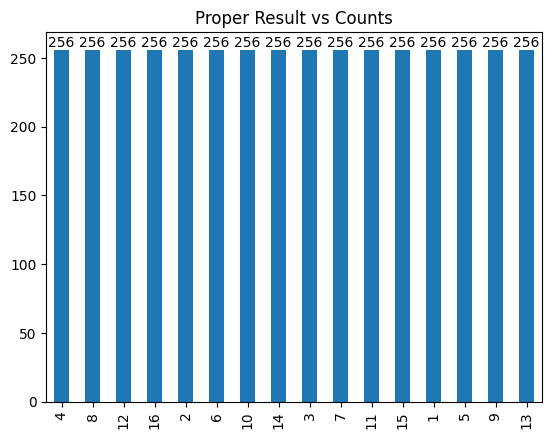

In [23]:
#@title Proper Result vs Counts
#@markdown As expected, counts of every results became same.
ax = data["Proper_Result"].value_counts().plot(kind='bar',title="Proper Result vs Counts")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
print("sum =", data["Proper_Result"].value_counts().sum())
plt.show()

In [33]:
#@title Simulation with Proper Result

QA = [
    {'Q': '從迷糊中醒來，你發現自己正在一節列車上，窗外風光明媚，你靜靜地感受了一陣子，然後：',
     'A': ['不去猜測目的地，等待未知的驚喜', '起身尋找路線圖，確認車要開去哪']},
    {'Q': '前方出現一座佈滿大大小小聚落的山，你決定下車看看。山上哪種氛圍讓你比較愉快？',
     'A': ['人聲鼎沸，有很多小商店可以串門子', '悠閒寧靜，少數人家正樸實的忙碌著']},
    {'Q': '山的入口，是一座神秘的窯坑，進去之前，你被突然衝出的一窩小貓，嚇了一跳：',
     'A': ['「呼！還好不是更兇的野生動物」', '「還這麼小，不知道牠們要去哪裡」']},
    {'Q': '走入坑道，你發現中央有一隻大鳥⋯⋯',
     'A': ['「呃，牠怎麼會在這？我該逃跑嗎？」', '「哇，牠好像很苦惱，要關心牠嗎？」']},
    {'Q': '大鳥很久沒看到人了，忍不住對你訴苦，委屈地說起自己遇到的鳥事，而你⋯⋯',
     'A': ['很同情大鳥，忍不住幫牠想想辦法', '表面上禮貌聆聽，大腦早就在神遊']},
    {'Q': '出洞口前，冒出一個老人，他邀請你從４杯茶裡，猜出他最喜歡的，於是你：',
     'A': ['問很多問題，兩人一起熱絡的品茶', '認真聽老人介紹，安靜悠閒的品茶']},
    {'Q': '老人把他最喜歡的茶葉送你，還順便推薦你去看看會泡溫泉的小海豹，你會⋯⋯',
     'A': ['把小海豹寫進行程，好好安排時間去看', '把小海豹放在心上，視時機與心情前往']},
    {'Q': '出來後，你攔了一輛計程車，但每一個路標都寫著一樣的路名，連司機都迷路。這時你會？',
     'A': ['幫忙看路，想從蛛絲馬跡中找到差異', '這狀況太不真實，一定中了什麼結界']},
    {'Q': '這時，前面出現了兩條長得一模一樣的老街，你會想要走進哪一條裡面逛逛？',
     'A': ['可以用第一人稱體驗每個人生活的街', '可以用上帝視角觀察每個人生活的街']},
    {'Q': '你到一間糕餅店稍作休息，隔壁的人在聊天，哪一個話題會讓你忍不住豎耳傾聽？',
     'A': ['洗菜的方法、火箭股價、甜甜圈的口味', '玄學、魔法、公平的代價、發光大竹筍']},
    {'Q': '繼續走到街的盡頭，出現了一片金色的海，你會選擇？',
     'A': ['探索海灘，拍下一路上的發現', '找個地方坐下，靜靜欣賞美景']},
    {'Q': '在舒服的海風中，你不小心睡著了。從迷糊中醒來，你發現自己正在一節列車上，窗外風光明媚，你不禁發現⋯⋯這一切又循環了！',
     'A': ['欸？那不就可以選選看另一個選項？', '天啊！好想知道這一切會重複幾遍？']}
]

result_names = ['精靈','貓系','岩石','水系','土系','風系','鋼系','超能','飛行','電系','光系','幽靈','冰系','草系','火系','毒系']

image_urls = [
        'https://github.com/PikasXYZ/TAIWAN-DESIGN-EXPO-23-in-NEW-TAIPEI-CITY/blob/main/pic/1_%E7%B2%BE%E9%9D%88.png?raw=true', #精靈
        'https://github.com/PikasXYZ/TAIWAN-DESIGN-EXPO-23-in-NEW-TAIPEI-CITY/blob/main/pic/2_%E8%B2%93%E7%B3%BB.png?raw=true', #貓系
        'https://github.com/PikasXYZ/TAIWAN-DESIGN-EXPO-23-in-NEW-TAIPEI-CITY/blob/main/pic/3_%E5%B2%A9%E7%9F%B3.png?raw=true', #岩石
        'https://github.com/PikasXYZ/TAIWAN-DESIGN-EXPO-23-in-NEW-TAIPEI-CITY/blob/main/pic/4_%E6%B0%B4%E7%B3%BB.png?raw=true', #水系
        'https://github.com/PikasXYZ/TAIWAN-DESIGN-EXPO-23-in-NEW-TAIPEI-CITY/blob/main/pic/5_%E5%9C%9F%E7%B3%BB.png?raw=true', #土系
        'https://github.com/PikasXYZ/TAIWAN-DESIGN-EXPO-23-in-NEW-TAIPEI-CITY/blob/main/pic/6_%E9%A2%A8%E7%B3%BB.png?raw=true', #風系
        'https://github.com/PikasXYZ/TAIWAN-DESIGN-EXPO-23-in-NEW-TAIPEI-CITY/blob/main/pic/7_%E9%8B%BC%E7%B3%BB.png?raw=true', #鋼系
        'https://github.com/PikasXYZ/TAIWAN-DESIGN-EXPO-23-in-NEW-TAIPEI-CITY/blob/main/pic/8_%E8%B6%85%E8%83%BD.png?raw=true', #超能
        'https://github.com/PikasXYZ/TAIWAN-DESIGN-EXPO-23-in-NEW-TAIPEI-CITY/blob/main/pic/9_%E9%A3%9B%E8%A1%8C.png?raw=true', #飛行
        'https://github.com/PikasXYZ/TAIWAN-DESIGN-EXPO-23-in-NEW-TAIPEI-CITY/blob/main/pic/10_%E9%9B%BB%E7%B3%BB.png?raw=true', #電系
        'https://github.com/PikasXYZ/TAIWAN-DESIGN-EXPO-23-in-NEW-TAIPEI-CITY/blob/main/pic/11_%E5%85%89%E7%B3%BB.png?raw=true', #光系
        'https://github.com/PikasXYZ/TAIWAN-DESIGN-EXPO-23-in-NEW-TAIPEI-CITY/blob/main/pic/12_%E5%B9%BD%E9%9D%88.png?raw=true', #幽靈
        'https://github.com/PikasXYZ/TAIWAN-DESIGN-EXPO-23-in-NEW-TAIPEI-CITY/blob/main/pic/13_%E5%86%B0%E7%B3%BB.png?raw=true', #冰系
        'https://github.com/PikasXYZ/TAIWAN-DESIGN-EXPO-23-in-NEW-TAIPEI-CITY/blob/main/pic/14_%E8%8D%89%E7%B3%BB.png?raw=true', #草系
        'https://github.com/PikasXYZ/TAIWAN-DESIGN-EXPO-23-in-NEW-TAIPEI-CITY/blob/main/pic/15_%E7%81%AB%E7%B3%BB.png?raw=true', #火系
        'https://github.com/PikasXYZ/TAIWAN-DESIGN-EXPO-23-in-NEW-TAIPEI-CITY/blob/main/pic/16_%E6%AF%92%E7%B3%BB.png?raw=true', #毒系
        ]

container = []
option_selectors = []

def response(change):

    As = [A.value for A in option_selectors]
    if all(As):
      result = [0,0,0,0]

      #lst
      if As[7] == "這狀況太不真實，一定中了什麼結界": result[0]+=1 #Q8
      if As[8] == "可以用上帝視角觀察每個人生活的街": result[0]+=1 #Q9
      if As[9] == "玄學、魔法、公平的代價、發光大竹筍": result[0]+=1 #Q10

      #2nd
      if As[0] == "起身尋找路線圖，確認車要開去哪": result[1]+=1 #Q1
      if As[6] == "把小海豹寫進行程，好好安排時間去看": result[1]+=1 #Q7
      if As[11] == "天啊！好想知道這一切會重複幾遍？": result[1]+=1 #Q12

      #3rd
      if As[1] == "人聲鼎沸，有很多小商店可以串門子": result[2]+=1 #Q2
      if As[5] == "問很多問題，兩人一起熱絡的品茶": result[2]+=1 #Q6
      if As[10] == "探索海灘，拍下一路上的發現": result[2]+=1 #Q11

      #4th
      if As[2] == "「呼！還好不是更兇的野生動物」": result[3]+=1 #Q3
      if As[3] == "「呃，牠怎麼會在這？我該逃跑嗎？」": result[3]+=1 #Q4
      if As[4] == "表面上禮貌聆聽，大腦早就在神遊": result[3]+=1 #Q5

      result = "".join([str(int(num>1)) for num in result])
      result = int(result, 2)
      clear_output(wait=True)
      print(f"你天生就混{result_names[result]}圈!")
      display(Image(url=image_urls[result],width=200))
      display(widgets.VBox(container))

for i, q in enumerate(QA):
    question_label = widgets.Label(value=f"Q{i+1}: {q['Q']}")
    option_selector = widgets.RadioButtons(options=q['A'], description="", value=q['A'][0])  # initial option is None
    option_selector.observe(response, names='value')
    option_selectors.append(option_selector)
    container.append(widgets.VBox([question_label, option_selector]))

display(widgets.VBox(container))


你天生就混超能圈!
